# Downloading Sentinel 5P data


## Sentinel 5P satellite

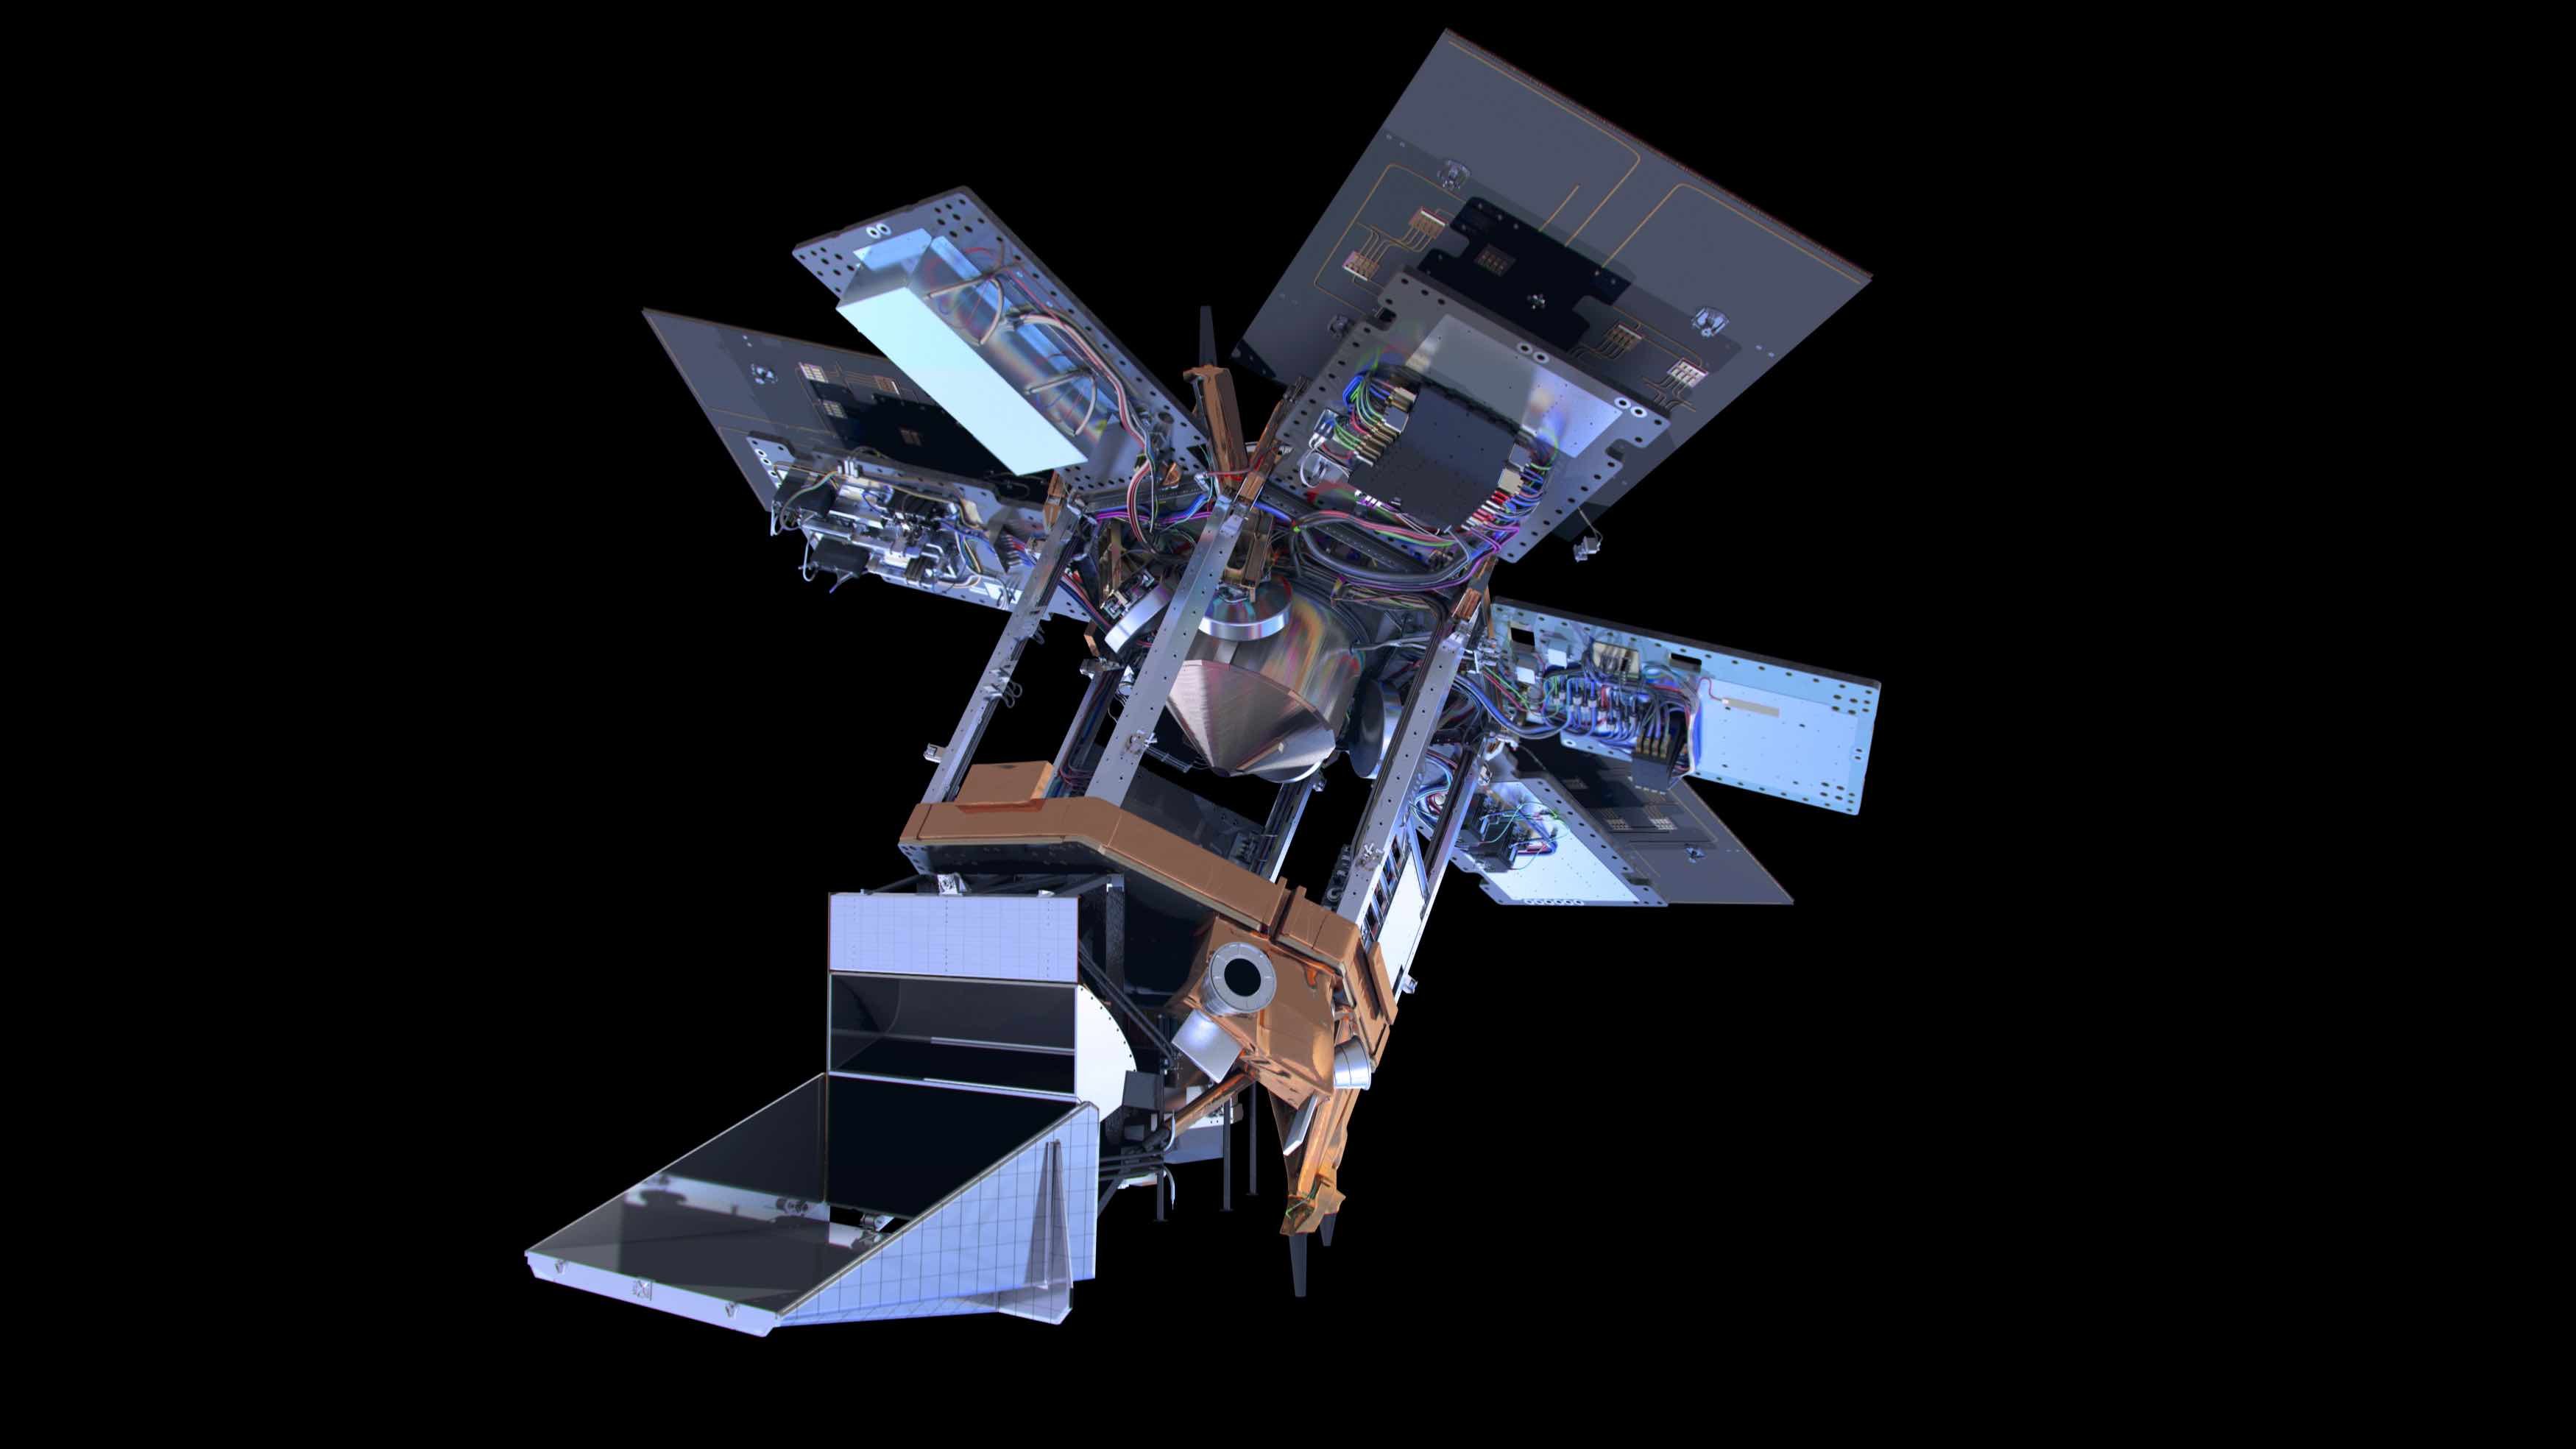
<center><i>Rendition of Sentinel 5 Precursor satellite in space</i></center>

### Tropomi sensor

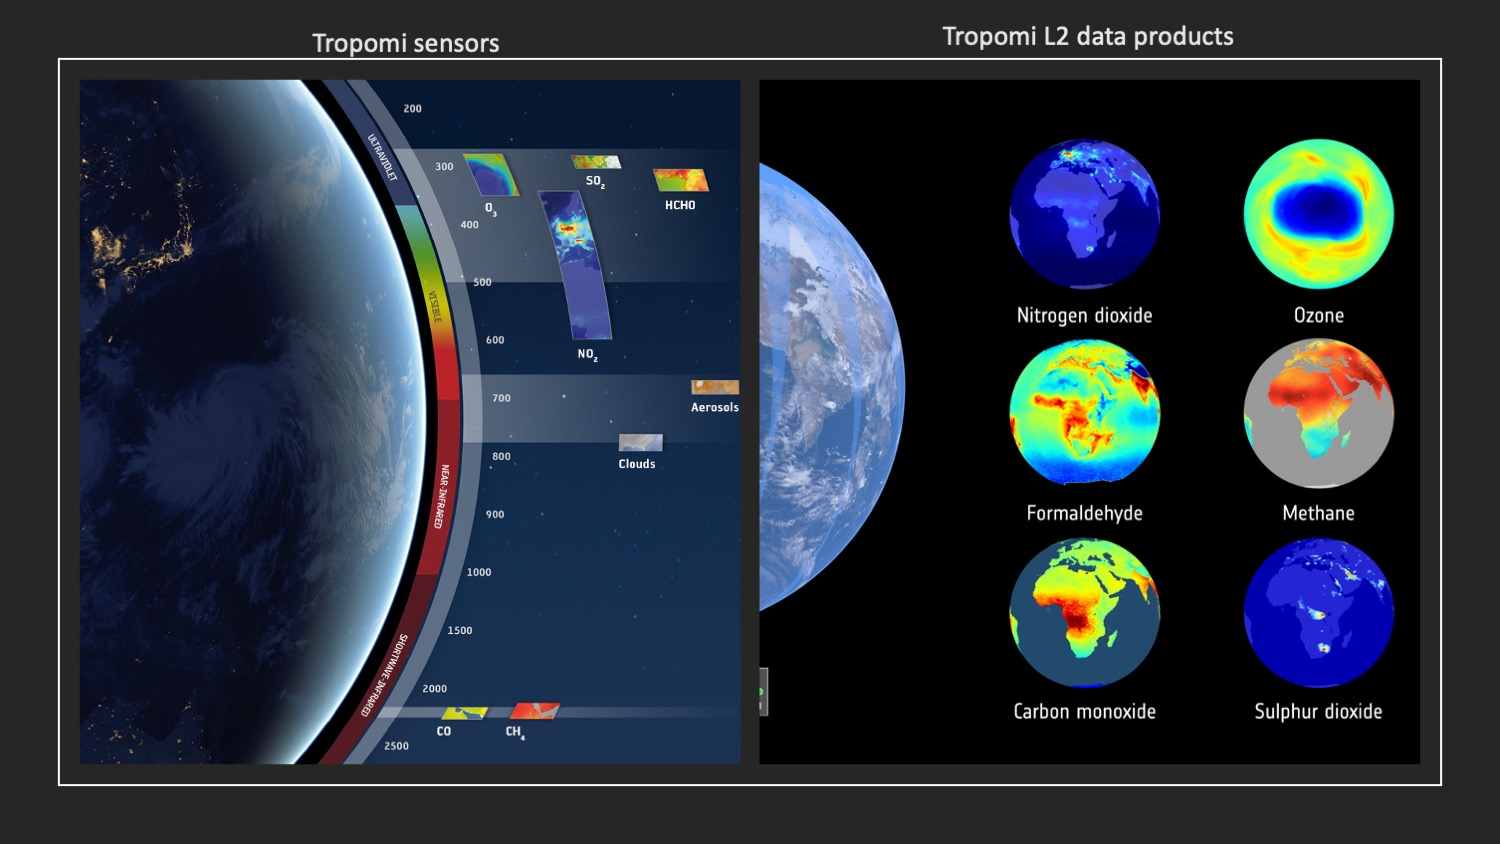
<center><i>Tropomi sensor and data products. Source: <a href="https://www.esa.int/Applications/Observing_the_Earth/Copernicus">ESA, Copernicus programme</a></i></center>

## Download Sentinel 5P data

### Install `sentinelsat` and `geopandas` libraries

In [80]:
!conda install geopandas -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopandas-0.6.1            |             py_0         911 KB  defaults
    pyproj-1.9.5.1             |           py36_0         3.3 MB  defaults
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  geopandas          pkgs/main/noarch::geopandas-0.6.1-py_0
  pyproj             pkgs/free/linux-64::pyproj-1.9.5.1-py36_0



pyproj-1.9.5.1       | 3.3 MB    | ##################################### | 100% 
geopandas-0.6

In [1]:
!pip install sentinelsat

In [54]:
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import GeoAccessor
from datetime import datetime, timedelta
gis = GIS("home")

### Search for data using SentinelSat API

In [2]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [3]:
api = SentinelAPI('s5pguest', 's5pguest', 'https://s5phub.copernicus.eu/dhus')
api

In [5]:
footprint = geojson_to_wkt(read_geojson('/arcgis/home/no2/la_aoi.geojson'))

api.count(footprint, date=('20190401', '20190420'), area_relation='Contains', 
          platformname='Sentinel-5',producttype='L2__NO2___')

20

#### Query for April 2020 over LA

In [56]:
now = datetime.now()
two_wk_ago = now - timedelta(days=12)
print(now, two_wk_ago)



now_str = now.strftime('%Y%m%d')
two_wk_ago_str = two_wk_ago.strftime('%Y%m%d')

2020-05-21 18:37:53.272481 2020-05-09 18:37:53.272481


In [57]:
products = api.query(area=footprint, area_relation='Contains',
                     date=(two_wk_ago_str, now_str),
                     platformname='Sentinel-5',
                     producttype='L2__NO2___',
                     order_by='cloudcoverpercentage'
                    )

In [21]:
products = api.query(area=footprint, area_relation='Intersects',
                     date=('20200401', date(2020, 4, 20)),
                     platformname='Sentinel-5',
                     producttype='L2__NO2___',
                     order_by='cloudcoverpercentage'
                    )

In [58]:
products_df = api.to_dataframe(products)
products_df.head()

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,filename,...,platformshortname,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid
b29fd387-2936-4c2a-b1ad-fed72a2e9dca,S5P_NRTI_L2__NO2____20200509T201639_20200509T2...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-09T20:16:33Z, Instrument: TROPOM...",2020-05-09 22:24:03.901,2020-05-09 20:16:33,2020-05-09 20:21:45,13328,S5P_NRTI_L2__NO2____20200509T201639_20200509T2...,...,S5P,L2,Near real time,NRTI,010302,L2__NO2___,Nitrogen Dioxide,01,46.05 MB,b29fd387-2936-4c2a-b1ad-fed72a2e9dca
dba090f0-06c8-4842-8c53-0edc94de677f,S5P_NRTI_L2__NO2____20200510T213639_20200510T2...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-10T21:36:33Z, Instrument: TROPOM...",2020-05-10 22:25:05.343,2020-05-10 21:36:33,2020-05-10 21:41:46,13343,S5P_NRTI_L2__NO2____20200510T213639_20200510T2...,...,S5P,L2,Near real time,NRTI,010302,L2__NO2___,Nitrogen Dioxide,01,43.86 MB,dba090f0-06c8-4842-8c53-0edc94de677f
95bf88a9-ff4d-4bdc-9be0-a0390a76c1da,S5P_NRTI_L2__NO2____20200513T204139_20200513T2...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-13T20:41:33Z, Instrument: TROPOM...",2020-05-13 21:30:06.009,2020-05-13 20:41:33,2020-05-13 20:46:46,13385,S5P_NRTI_L2__NO2____20200513T204139_20200513T2...,...,S5P,L2,Near real time,NRTI,010302,L2__NO2___,Nitrogen Dioxide,01,45.98 MB,95bf88a9-ff4d-4bdc-9be0-a0390a76c1da
a6057e9a-0ab9-49ae-aa39-d07a5660cbac,S5P_NRTI_L2__NO2____20200514T202139_20200514T2...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-14T20:21:34Z, Instrument: TROPOM...",2020-05-14 21:20:06.001,2020-05-14 20:21:34,2020-05-14 20:26:45,13399,S5P_NRTI_L2__NO2____20200514T202139_20200514T2...,...,S5P,L2,Near real time,NRTI,010302,L2__NO2___,Nitrogen Dioxide,01,45.97 MB,a6057e9a-0ab9-49ae-aa39-d07a5660cbac
1d4a1162-6106-41ba-8935-1a1cdf46f09b,S5P_NRTI_L2__NO2____20200511T211639_20200511T2...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-11T21:16:34Z, Instrument: TROPOM...",2020-05-11 22:05:21.842,2020-05-11 21:16:34,2020-05-11 21:21:45,13357,S5P_NRTI_L2__NO2____20200511T211639_20200511T2...,...,S5P,L2,Near real time,NRTI,010302,L2__NO2___,Nitrogen Dioxide,01,43.24 MB,1d4a1162-6106-41ba-8935-1a1cdf46f09b


## Visualize orbits on a globe

### Export orbit information to GeoPandas GeoDataFrame

In [59]:
products_gdf = api.to_geodataframe(products)

### Import GeoDataFrame into ArcGIS Spatially Enabled DataFrames

In [85]:
products_sdf = pd.DataFrame.spatial.from_geodataframe(products_gdf)

In [99]:
map1 = gis.map('USA')
map1.mode='3D'
map1.basemap = 'gray-vector'
map1

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [100]:
products_sdf.spatial.plot(map1, palette = 'PuBu', renderer_type='u',col='uuid', alpha=0.1)

True

#### Download netCDF files

In [25]:
api.download(products_df.iloc[0]['uuid'], checksum=False)

Downloading: 100%|██████████| 450M/450M [02:19<00:00, 3.23MB/s] 


{'id': 'a893506e-9513-478c-b842-cb507bc1b4d2',
 'title': 'S5P_OFFL_L2__NO2____20200403T203502_20200403T221633_12818_01_010302_20200415T012445',
 'size': 450218203,
 'md5': 'F2C8C4A7B79E6E96880986B8411428CD',
 'date': datetime.datetime(2020, 4, 3, 20, 56, 37),
 'footprint': 'POLYGON((96.99674 59.542732,99.14432 60.606888,101.4402 61.63194,103.89481 62.61345,106.51768 63.54657,109.31715 64.42603,112.30011 65.24614,115.47006 66.0009,118.827385 66.68393,122.36767 67.28888,126.08097 67.80921,129.95091 68.23891,133.95393 68.57243,138.06038 68.8054,142.2353 68.93455,146.43964 68.95783,150.63228 68.87472,154.7734 68.68711,158.82564 68.39704,162.75667 68.00882,166.54077 67.5275,170.15814 66.95904,173.59633 66.309654,176.84834 65.58558,179.91246 64.79342,-177.2084 63.939507,-174.50978 63.02915,-171.98236 62.068607,-169.61806 61.062424,-167.40672 60.015213,-165.33826 58.93108,-163.40247 57.813824,-161.5892 56.666668,-159.88911 55.49273,-158.29333 54.29459,-156.79393 53.07439,-155.38275 51.834423,